In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseDF = pd.read_csv("data/mouse_drug_data.csv")
clinicalDF = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
mouse_clinicalDF = pd.merge(mouseDF, clinicalDF, how="outer", on="Mouse ID")

# Display the data table for preview & Drop all medicines not used in comparision
mouse_clinicalDF1= mouse_clinicalDF[mouse_clinicalDF.Drug != 'Stelasyn'] 
mouse_clinicalDF2= mouse_clinicalDF1[mouse_clinicalDF.Drug != 'Propriva'] 
mouse_clinicalDF3= mouse_clinicalDF2[mouse_clinicalDF.Drug != 'Naftisol']
mouse_clinicalDF4= mouse_clinicalDF3[mouse_clinicalDF.Drug != 'Ceftamin']
mouse_clinicalDF5= mouse_clinicalDF4[mouse_clinicalDF.Drug != 'Zoniferol']
mouse_clinicalDF6= mouse_clinicalDF5[mouse_clinicalDF.Drug != 'Ramicane']
mouse_clinicalDF6

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [2]:
#Describe Main DF after merge
mouse_clinicalDF.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
TrT = mouse_clinicalDF.loc[:, ["Drug", "Timepoint", "Tumor Volume (mm3)"]]
# Convert to DataFrame
TrTA = pd.DataFrame(TrT)
# Preview DataFrame
TrTA

,Drug,Timepoint,Tumor Volume (mm3)
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324
3,Stelasyn,15,48.735197
4,Stelasyn,20,51.112713
...,...,...,...
1901,Placebo,0,45.000000
1902,Placebo,5,46.588820
1903,Placebo,10,48.018788
1904,Placebo,15,51.161138


In [4]:
TrTA.rename(columns={'Tumor Volume (mm3)': 'Tumor_Volume_mm3'}, inplace=True)
#print(TrTA)
TrTAtime=TrTA.set_index('Timepoint')
print (TrTAtime)
#TrTAtime=TrTAtime.T


               Drug  Tumor_Volume_mm3
Timepoint                            
0          Stelasyn         45.000000
5          Stelasyn         47.313491
10         Stelasyn         47.904324
15         Stelasyn         48.735197
20         Stelasyn         51.112713
...             ...               ...
0           Placebo         45.000000
5           Placebo         46.588820
10          Placebo         48.018788
15          Placebo         51.161138
20          Placebo         52.942902

[1906 rows x 2 columns]


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
print(f"The mean Tumor Volume of all drugs is: {round(TrTA.Tumor_Volume_mm3.mean(),3)}")
print(f"The standard deviation of all drugs Tumor Volume is: {TrTA.Tumor_Volume_mm3.std()}")


The mean Tumor Volume of all drugs is: 50.468
The standard deviation of all drugs Tumor Volume is: 8.869571440055733


In [6]:
#isolate each one of the four drugs that we are comparing
mouse_clinicalDF7= mouse_clinicalDF6[mouse_clinicalDF.Drug != 'Infubinol']
mouse_clinicalDF8= mouse_clinicalDF7[mouse_clinicalDF.Drug != 'Ketapril']
mouse_clinicalDF_Capomulin= mouse_clinicalDF8[mouse_clinicalDF.Drug != 'Placebo']
mouse_clinicalDF_Capomulin

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
581,b128,Capomulin,0,45.000000,0
582,b128,Capomulin,5,45.651331,0
583,b128,Capomulin,10,43.270852,0
584,b128,Capomulin,15,43.784893,0
585,b128,Capomulin,20,42.731552,0
...,...,...,...,...,...
806,j246,Capomulin,15,43.312654,0
807,j246,Capomulin,20,44.020370,0
808,j246,Capomulin,25,44.555226,0
809,j246,Capomulin,30,38.044082,1


In [7]:
#Describe Capomulin
mouse_clinicalDF_Capomulin.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,230.000000,230.000000,230.000000
mean,21.565217,40.675741,0.713043
std,14.384994,4.994774,0.848993
min,0.000000,23.343598,0.000000
25%,10.000000,37.685933,0.000000
50%,20.000000,41.557809,0.000000
75%,35.000000,45.000000,1.000000
max,45.000000,48.158209,3.000000


In [8]:
time = mouse_clinicalDF_Capomulin["Timepoint"]
TumorV= mouse_clinicalDF_Capomulin["Tumor Volume (mm3)"]
Metastatic= mouse_clinicalDF_Capomulin["Metastatic Sites"]

Text(0, 0.5, 'Tumor Volume (mm3)')

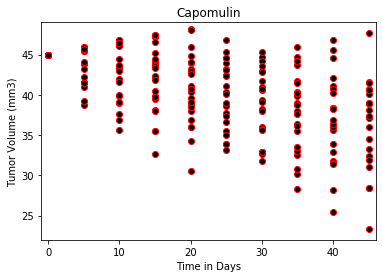

In [9]:
# Scatter plot change in tumor over time for Capomulin
plt.scatter(time, TumorV, marker="o", facecolors="black", edgecolors="red")
plt.ylim(22,49)
plt.xlim(-1,46)
plt.title("Capomulin")
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)")
# Save the Figure



Text(0, 0.5, 'Metastatic Sites')

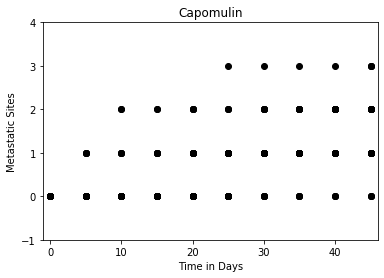

In [10]:
# Capomilin Metastatic sites comparision
plt.scatter(time, Metastatic, marker="o", facecolors="black", edgecolors="black")
plt.ylim(-1,4)
plt.xlim(-1,46)
plt.title("Capomulin")
plt.xlabel("Time in Days")
plt.ylabel("Metastatic Sites")

In [11]:
mouse_clinicalDF9= mouse_clinicalDF6[mouse_clinicalDF.Drug != 'Capomulin']
mouse_clinicalDF10= mouse_clinicalDF9[mouse_clinicalDF.Drug != 'Ketapril']
mouse_clinicalDF_Infubinol= mouse_clinicalDF10[mouse_clinicalDF.Drug != 'Placebo']
mouse_clinicalDF_Infubinol

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
811,q132,Infubinol,0,45.000000,0
812,q132,Infubinol,5,46.716399,1
813,q132,Infubinol,10,47.953844,2
814,q132,Infubinol,15,49.159749,3
815,q132,Infubinol,20,51.909025,4
...,...,...,...,...,...
984,a685,Infubinol,25,51.939951,0
985,a685,Infubinol,30,55.453855,1
986,a685,Infubinol,35,58.092629,1
987,a685,Infubinol,40,60.567904,2


In [12]:
#describe Infubinol
mouse_clinicalDF_Infubinol.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,178.000000,178.000000,178.000000
mean,18.174157,52.957935,0.960674
std,13.473473,6.453240,1.027104
min,0.000000,45.000000,0.000000
25%,5.000000,47.431605,0.000000
50%,15.000000,51.820584,1.000000
75%,30.000000,57.314444,2.000000
max,45.000000,72.226731,4.000000


In [13]:
time = mouse_clinicalDF_Infubinol["Timepoint"]
TumorV= mouse_clinicalDF_Infubinol["Tumor Volume (mm3)"]
Metastatic= mouse_clinicalDF_Infubinol["Metastatic Sites"]

Text(0, 0.5, 'Tumor Volume (mm3)')

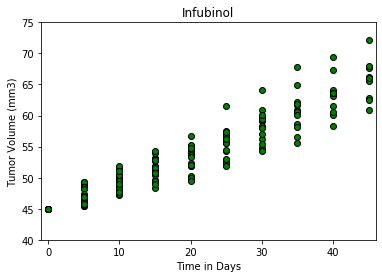

In [14]:
# Scatter plot change in tumor over time for Infuninol
plt.scatter(time, TumorV, marker="o", facecolors="green", edgecolors="black")
plt.ylim(40,75)
plt.xlim(-1,46)
plt.title("Infubinol")
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Metastatic Sites')

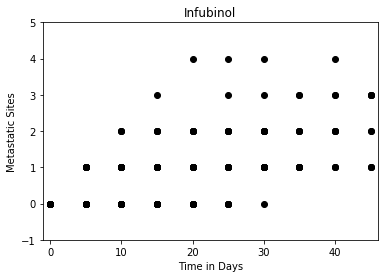

In [25]:
# Infubinol Metastatic sites comparision
plt.scatter(time, Metastatic, marker="o", facecolors="black", edgecolors="black")
plt.ylim(-1,5)
plt.xlim(-1,46)
plt.title("Infubinol")
plt.xlabel("Time in Days")
plt.ylabel("Metastatic Sites")

In [26]:
mouse_clinicalDF11= mouse_clinicalDF6[mouse_clinicalDF.Drug != 'Capomulin']
mouse_clinicalDF12= mouse_clinicalDF11[mouse_clinicalDF.Drug != 'Infubinol']
mouse_clinicalDF_Ketapril= mouse_clinicalDF12[mouse_clinicalDF.Drug != 'Placebo']
mouse_clinicalDF_Ketapril

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0
...,...,...,...,...,...
576,u327,Ketapril,30,57.314072,0
577,u327,Ketapril,35,58.089028,1
578,u327,Ketapril,40,60.466545,1
579,u327,Ketapril,45,66.268801,2


In [27]:
mouse_clinicalDF_Ketapril.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,188.000000,188.000000,188.000000
mean,19.707447,55.235638,1.297872
std,14.029935,8.279709,1.393873
min,0.000000,45.000000,0.000000
25%,5.000000,48.232987,0.000000
50%,20.000000,53.698743,1.000000
75%,30.000000,60.870951,2.000000
max,45.000000,78.567014,4.000000


In [ ]:
time = mouse_clinicalDF_Ketapril["Timepoint"]
TumorV= mouse_clinicalDF_Ketapril["Tumor Volume (mm3)"]
Metastatic= mouse_clinicalDF_Ketrapril["Metastatic Sites"]

Text(0, 0.5, 'Tumor Volume (mm3)')

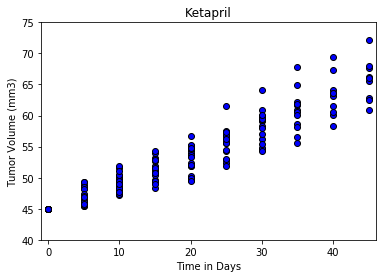

In [30]:
# Scatter plot change in tumor over time for Ketapril
plt.scatter(time, TumorV, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(40,75)
plt.xlim(-1,46)
plt.title("Ketapril")
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Metastatic Sites')

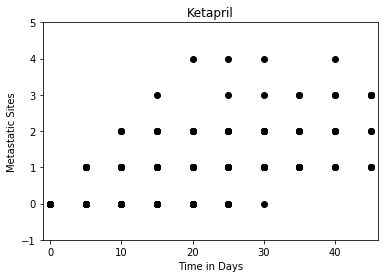

In [29]:
# Ketapril Metastatic sites comparision
plt.scatter(time, Metastatic, marker="o", facecolors="black", edgecolors="black")
plt.ylim(-1,5)
plt.xlim(-1,46)
plt.title("Ketapril")
plt.xlabel("Time in Days")
plt.ylabel("Metastatic Sites")

In [32]:
mouse_clinicalDF13= mouse_clinicalDF6[mouse_clinicalDF.Drug != 'Capomulin']
mouse_clinicalDF14= mouse_clinicalDF13[mouse_clinicalDF.Drug != 'Ketapril']
mouse_clinicalDF_Placebo= mouse_clinicalDF14[mouse_clinicalDF.Drug != 'Infubinol']
mouse_clinicalDF_Placebo

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
1725,a897,Placebo,0,45.000000,0
1726,a897,Placebo,5,45.691124,1
1727,a897,Placebo,10,47.972927,1
1728,a897,Placebo,15,52.343085,2
1729,a897,Placebo,20,54.595705,3
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [33]:
mouse_clinicalDF_Placebo.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,181.000000,181.000000,181.000000
mean,18.674033,54.033581,1.441989
std,13.890798,7.821003,1.338824
min,0.000000,45.000000,0.000000
25%,5.000000,47.459053,0.000000
50%,15.000000,52.288934,1.000000
75%,30.000000,59.916934,2.000000
max,45.000000,73.212939,4.000000


In [ ]:
time = mouse_clinicalDF_Placebo["Timepoint"]
TumorV= mouse_clinicalDF_Placebo["Tumor Volume (mm3)"]
Metastatic= mouse_clinicalDF_Placebo["Metastatic Sites"]

Text(0, 0.5, 'Tumor Volume (mm3)')

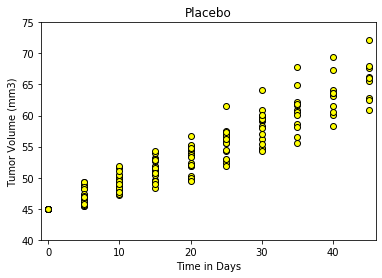

In [34]:
# Scatter plot change in tumor over time for Placebo
plt.scatter(time, TumorV, marker="o", facecolors="yellow", edgecolors="black")
plt.ylim(40,75)
plt.xlim(-1,46)
plt.title("Placebo")
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Metastatic Sites')

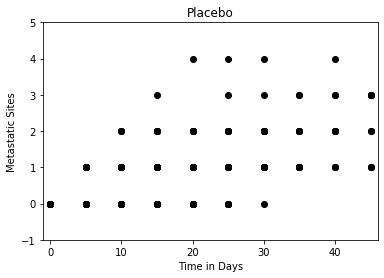

In [35]:
plt.scatter(time, Metastatic, marker="o", facecolors="black", edgecolors="black")
plt.ylim(-1,5)
plt.xlim(-1,46)
plt.title("Placebo")
plt.xlabel("Time in Days")
plt.ylabel("Metastatic Sites")

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [15]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [16]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [17]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [18]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [20]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [21]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [22]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [23]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)